<a href="https://colab.research.google.com/github/Cloudcredits/Cloudcredit-project/blob/main/Data_Analytics_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Dataset**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/House Price Prediction Dataset.csv")

print(dataset.head(5))

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [3]:
dataset.shape

(2000, 10)

**Data Preprocessing**

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('/House Price Prediction Dataset.csv')

print("Initial Dataset:\n", df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

X = pd.DataFrame(scaled_features, columns=df.columns.drop('Price'))
y = df['Price']

Initial Dataset:
    Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  

In [18]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int64')
int_cols = list(int_[int_].index)
print("Integer variables:", len(int_cols))

fl = (dataset.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 7
Float variables: 0


**Exploratory Data Analysis (EDA) Heatmap Code Using Seaborn**

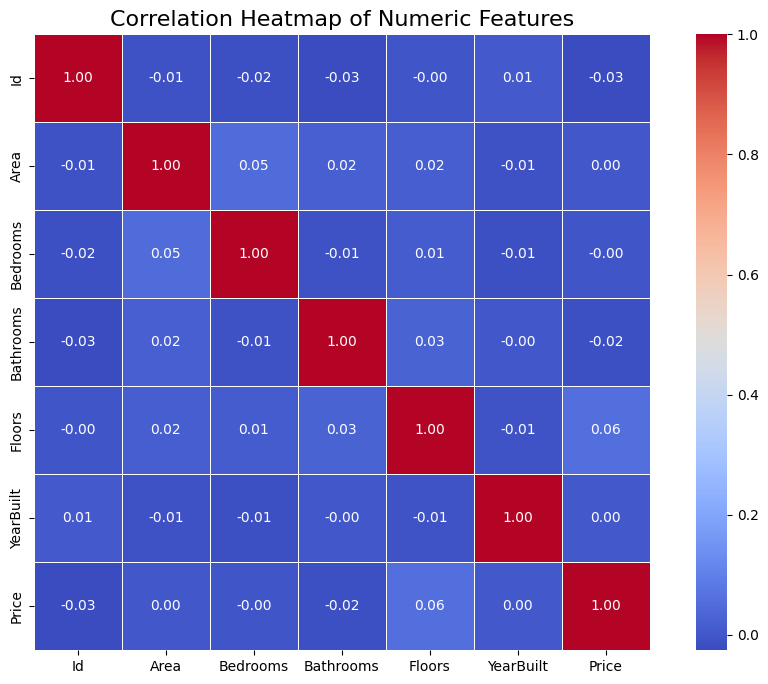

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/House Price Prediction Dataset.csv')

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()


**Bar Plot for Categorical Features**

<ipython-input-24-5890c65c7915>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


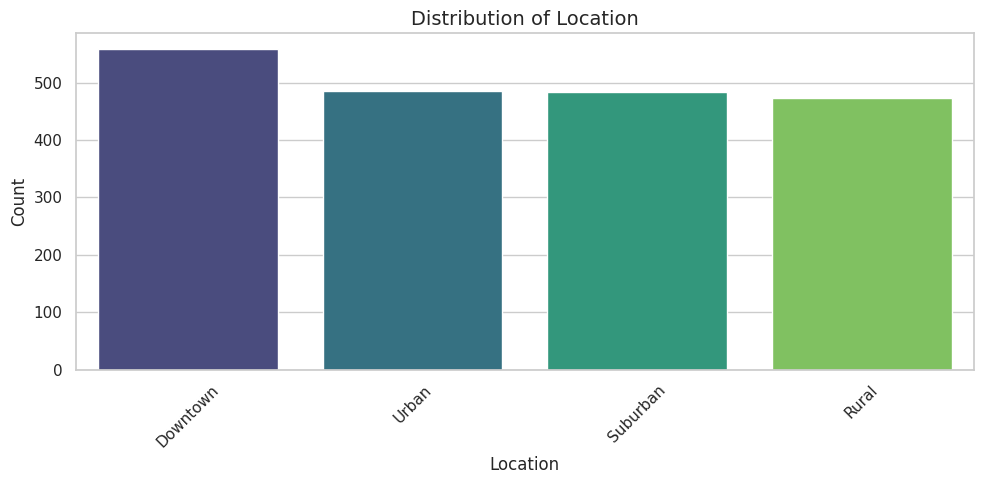

<ipython-input-24-5890c65c7915>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


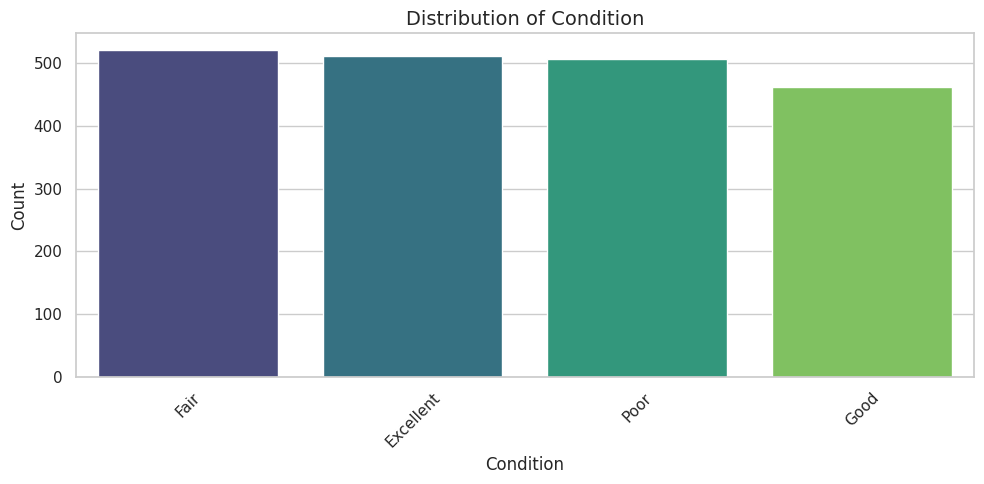

<ipython-input-24-5890c65c7915>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


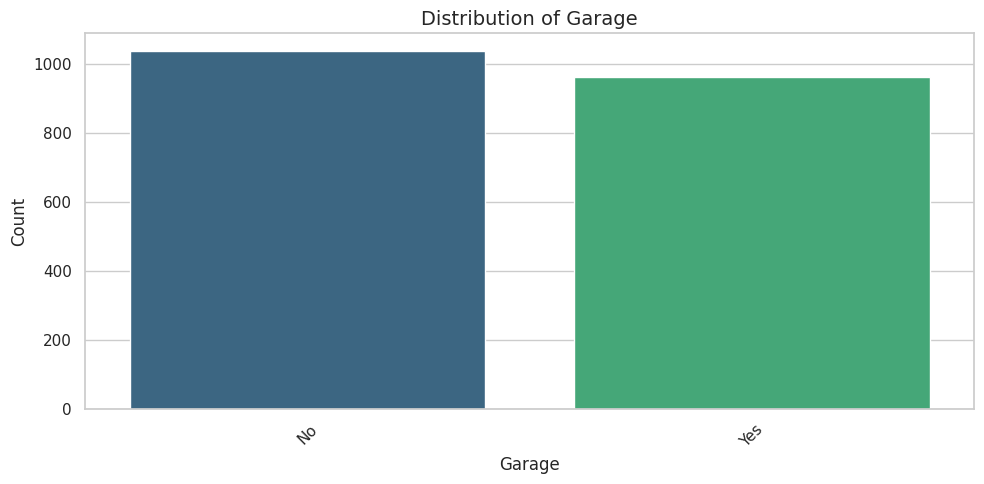

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/House Price Prediction Dataset.csv')

categorical_cols = df.select_dtypes(include='object').columns

sns.set(style="whitegrid")

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

**Data cleaning**

In [29]:
import pandas as pd

df = pd.read_csv("/House Price Prediction Dataset.csv")

df.drop_duplicates(inplace=True)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

categorical_cols = ['location', 'condition', 'garage']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df = df[(df['yearbuilt'] >= 1800) & (df['yearbuilt'] <= 2025)]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())

   id  area  bedrooms  bathrooms  floors  yearbuilt   price  location_Rural  \
0   1  1360         5          4       3       1970  149919           False   
1   2  4272         5          4       3       1958  424998           False   
2   3  3592         2          2       3       1938  266746           False   
3   4   966         4          2       2       1902  244020           False   
4   5  4926         1          4       2       1975  636056           False   

   location_Suburban  location_Urban  condition_Fair  condition_Good  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False            True   
3               True           False            True           False   
4              False           False            True           False   

   condition_Poor  garage_Yes  
0           False       False  
1           False       Fals

**OneHotEncoder**

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("/House Price Prediction Dataset.csv")

categorical_cols = ['Location', 'Condition', 'Garage']

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

print(df_encoded.head())



   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt   Price  Location_Rural  \
0   1  1360         5          4       3       1970  149919             0.0   
1   2  4272         5          4       3       1958  424998             0.0   
2   3  3592         2          2       3       1938  266746             0.0   
3   4   966         4          2       2       1902  244020             0.0   
4   5  4926         1          4       2       1975  636056             0.0   

   Location_Suburban  Location_Urban  Condition_Fair  Condition_Good  \
0                0.0             0.0             0.0             0.0   
1                0.0             0.0             0.0             0.0   
2                0.0             0.0             0.0             1.0   
3                1.0             0.0             1.0             0.0   
4                0.0             0.0             1.0             0.0   

   Condition_Poor  Garage_Yes  
0             0.0         0.0  
1             0.0         0.

**Splitting Dataset into Training and Testing**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("/House Price Prediction Dataset.csv")

X = df.drop(columns=["Price"])
y = df["Price"]

categorical_cols = ["Location", "Condition", "Garage"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

X = pd.concat([X.drop(columns=categorical_cols), encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (1600, 13)
Testing features shape: (400, 13)
Training labels shape: (1600,)
Testing labels shape: (400,)


**Model Training and Accuracy**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("/House Price Prediction Dataset.csv")

X = df.drop(columns=["Price"])
y = df["Price"]

categorical_cols = ["Location", "Condition", "Garage"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

X = pd.concat([X.drop(columns=categorical_cols), encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score (Accuracy):", round(r2, 4))
print("Mean Squared Error:", round(mse, 2))


R² Score (Accuracy): -0.0062
Mean Squared Error: 78279764120.86


**Basic Statistical Analysis**

In [8]:
print(df.corr(numeric_only=True)["Price"].sort_values(ascending=False))


Price        1.000000
Floors       0.055890
YearBuilt    0.004845
Area         0.001542
Bedrooms    -0.003471
Bathrooms   -0.015737
Id          -0.025643
Name: Price, dtype: float64


**VISUALIZATION**

Summary Statistics:
                Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000     1.000000     1.00000     1.000000   
25%     500.750000  1653.000000     2.000000     2.00000     1.000000   
50%    1000.500000  2833.000000     3.000000     3.00000     2.000000   
75%    1500.250000  3887.500000     4.000000     4.00000     3.000000   
max    2000.000000  4999.000000     5.000000     4.00000     3.000000   

         YearBuilt          Price  
count  2000.000000    2000.000000  
mean   1961.446000  537676.855000  
std      35.926695  276428.845719  
min    1900.000000   50005.000000  
25%    1930.000000  300098.000000  
50%    1961.000000  539254.000000  
75%    1993.000000  780086.000000  
max    2023.000000  999656.000000 

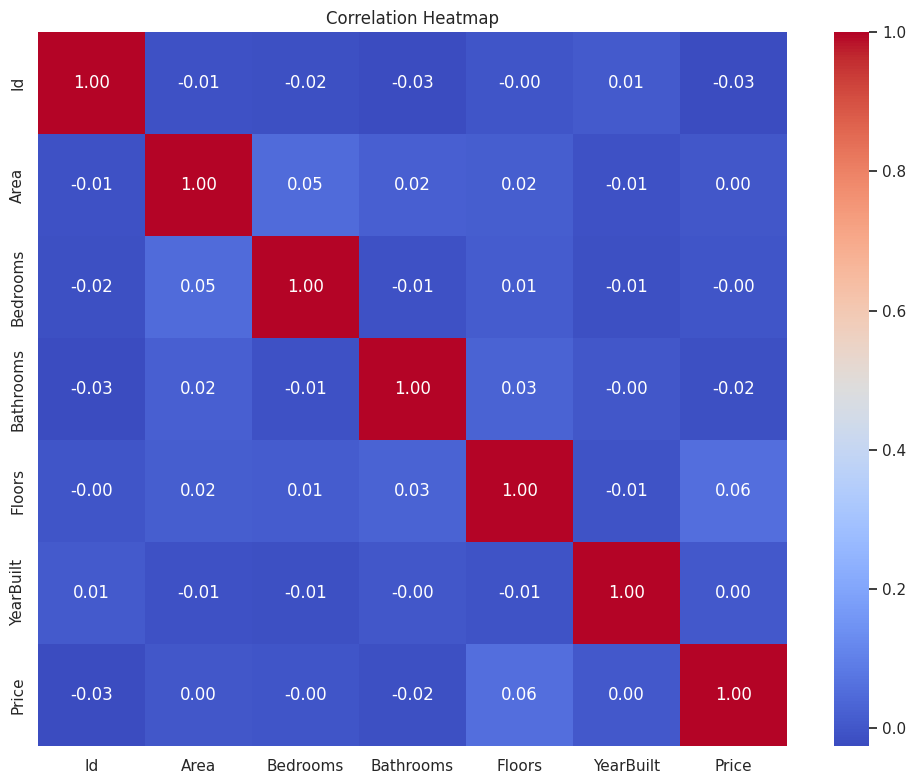

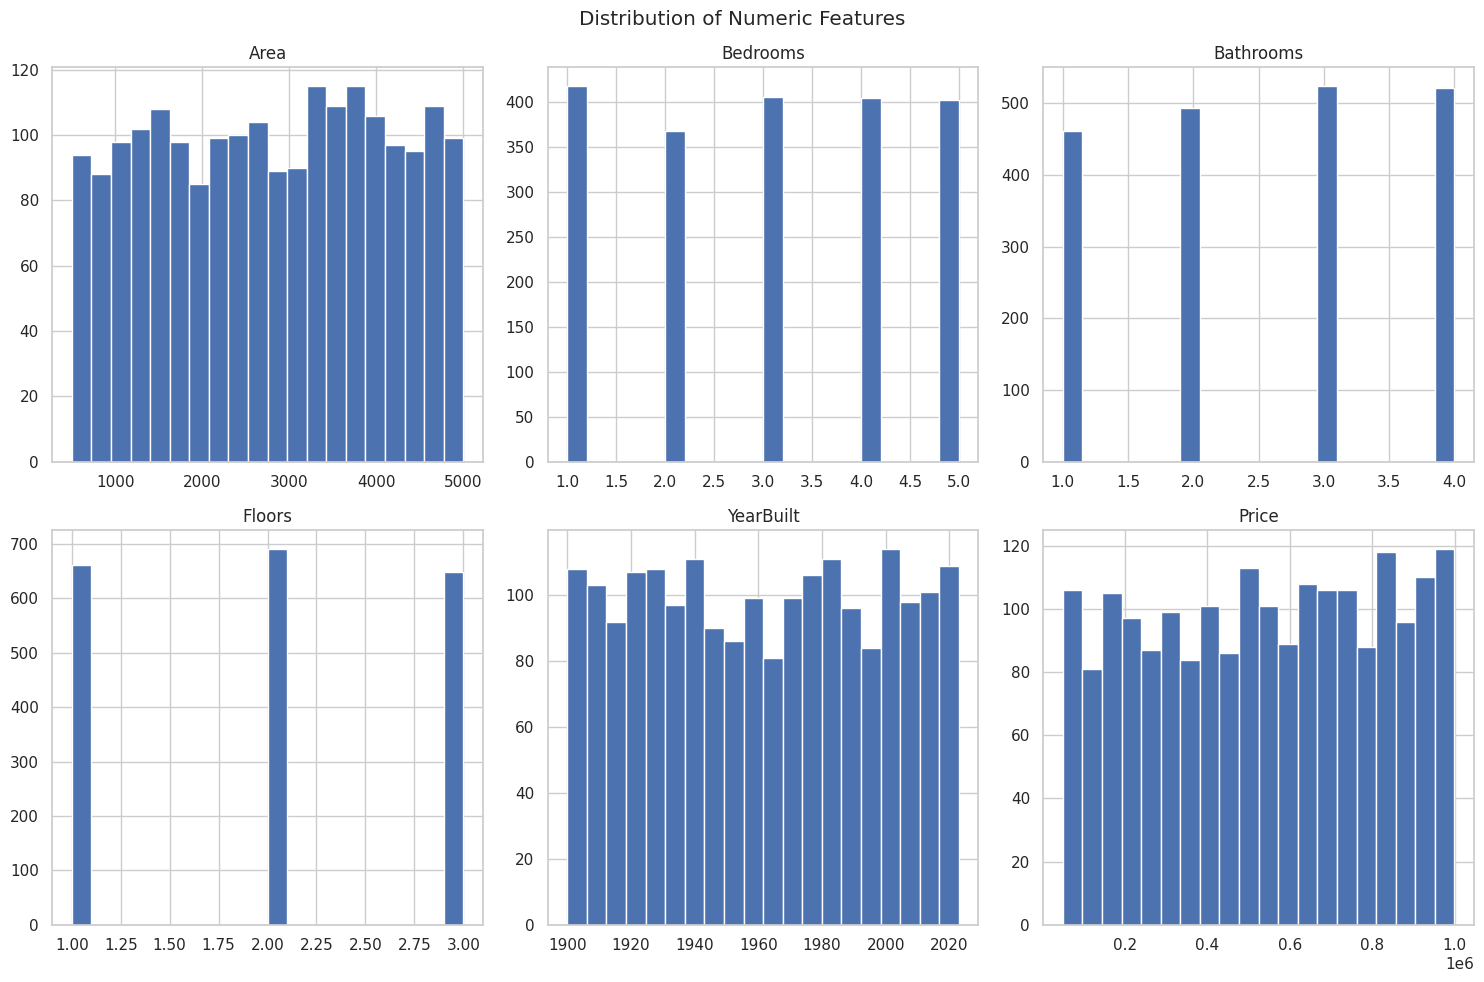

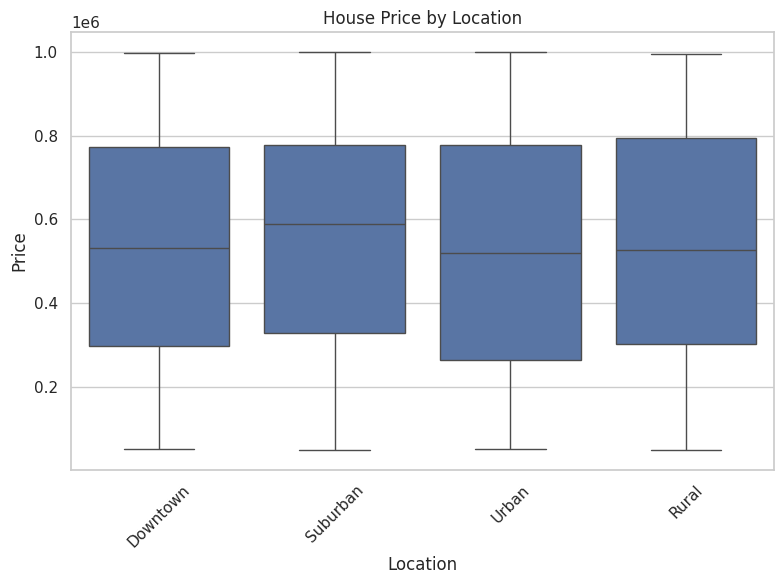

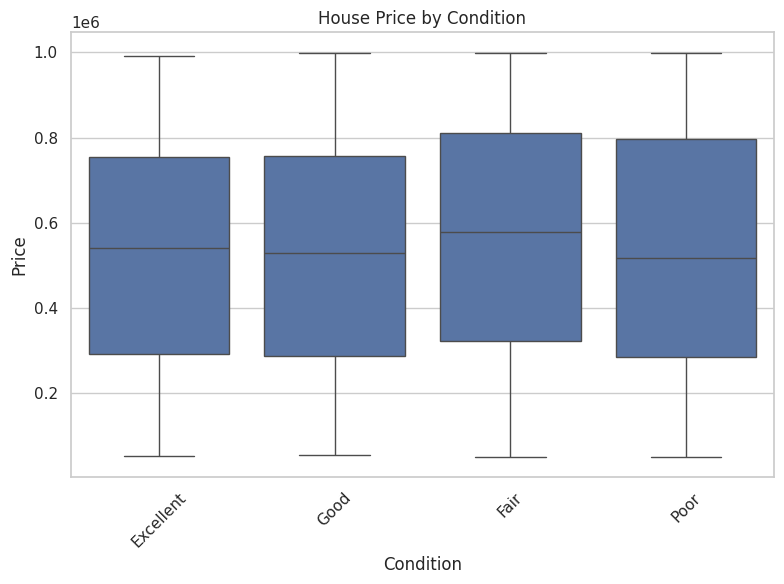

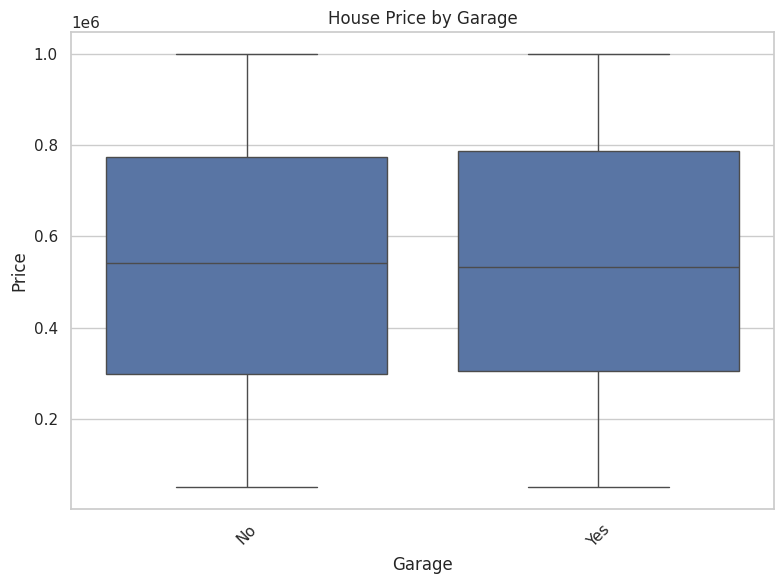

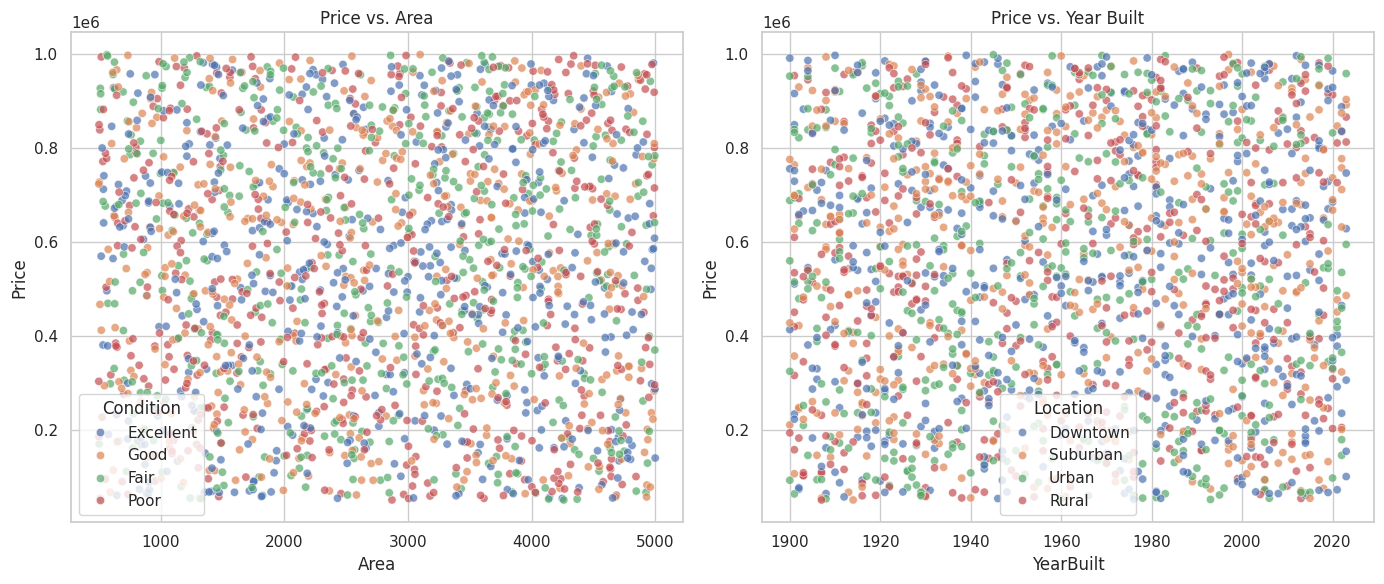

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/House Price Prediction Dataset.csv')

# Set visual style
sns.set(style="whitegrid")

# 1. Summary statistics
print("Summary Statistics:")
print(df.describe())

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 3. Distribution plots for numeric columns
numeric_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
df[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Distribution of Numeric Features")
plt.tight_layout()
plt.show()

# 4. Box plots for categorical variables vs. Price
categorical_cols = ['Location', 'Condition', 'Garage']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col, y='Price')
    plt.title(f'House Price by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Scatter plots for selected numerical features vs. Price
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Area', y='Price', hue='Condition', edgecolor='w', alpha=0.7)
plt.title('Price vs. Area')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='YearBuilt', y='Price', hue='Location', edgecolor='w', alpha=0.7)
plt.title('Price vs. Year Built')

plt.tight_layout()
plt.show()